# menghitung dan menampilkan jumlah outlayer

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


Kode ini berfungsi untuk mengambil data dari dua database (PostgreSQL dan MySQL), menggabungkannya berdasarkan ID dan kelas, lalu melakukan deteksi outlier menggunakan metode Local Outlier Factor (LOF).


Mengambil data dari PostgreSQL dan MySQL.

Menggabungkan data berdasarkan id dan class.

Mendeteksi outlier menggunakan Local Outlier Factor (LOF).

Menampilkan tabel ID dan status outlier.

Menghitung dan menampilkan jumlah outlier yang ditemukan.

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

# Menerapkan Local Outlier Factor untuk deteksi outlier
X = df_merged.iloc[:, 2:].values  # Mengambil fitur numerik
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df_merged['outlier'] = np.where(y_pred == -1, -1, 1)  # Menandai outlier (-1) dan non-outlier (1)
X_scores = clf.negative_outlier_factor_

# Menampilkan tabel ID dan status outlier
outlier_table = df_merged[['id','class', 'outlier']]
print("\nTabel ID dan Status Outlier:")
print(outlier_table.to_string(index=False))

# Menampilkan jumlah outlier
total_outliers = (y_pred == -1).sum()
print(f"Jumlah outlier yang terdeteksi: {total_outliers}")

# Visualisasi data
# Scatter plot antar variabel
# sns.pairplot(df_merged, hue="class")
# plt.show()

# # Visualisasi data dengan boxplot per class
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxplot(x="class", y=df_merged.iloc[:, 2], data=df_merged)
# plt.title("Boxplot Petal Length per Class")

# plt.subplot(1, 2, 2)
# sns.boxplot(x="class", y=df_merged.iloc[:, 3], data=df_merged)
# plt.title("Boxplot Sepal Length per Class")

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxplot(x="class", y=df_merged.iloc[:, 4], data=df_merged)
# plt.title("Boxplot Petal Width per Class")

# plt.subplot(1, 2, 2)
# sns.boxplot(x="class", y=df_merged.iloc[:, 5], data=df_merged)
# plt.title("Boxplot Sepal Width per Class")

# plt.show()

# Fungsi untuk memperbarui ukuran marker pada legend
# def update_legend_marker_size(handle, orig):
#     "Customize size of the legend marker"
#     handle.update_from(orig)
#     handle.set_sizes([20])

# plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
# radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# scatter = plt.scatter(
#     X[:, 0],
#     X[:, 1],
#     s=1000 * radius,
#     edgecolors="r",
#     facecolors="none",
#     label="Outlier scores",
# )
# plt.axis("tight")
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.xlabel("prediction errors: %d" % (total_outliers))
# plt.legend(
#     handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
# )
# plt.title("Local Outlier Factor (LOF)")
# plt.show()


 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          49.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa          14.0         20.0           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          19.0          2.0           4.8          3.4
 13     Iris-setosa           1.4     

Kode ini berfungsi untuk mengambil data dari dua database (PostgreSQL & MySQL), menggabungkannya, melakukan deteksi outlier dengan Local Outlier Factor (LOF), lalu menghapus data outlier sebelum menampilkan hasil akhir


-Mengambil data dari PostgreSQL dan MySQL menggunakan psycopg2 dan pymysql.

-Menggabungkan data berdasarkan id dan class (hanya yang ada di kedua database).

-Menerapkan Local Outlier Factor (LOF) untuk deteksi outlier.

-Menghapus outlier dari data.

-Menampilkan jumlah data sebelum dan setelah pembersihan.

-(Opsional) Menampilkan visualisasi scatter plot data yang telah dibersihkan.

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_values)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Menampilkan jumlah data sebelum dan setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df_merged.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")

# Menampilkan data yang telah dibersihkan
print(df_cleaned.to_string(index=False))

# # Visualisasi data setelah pembersihan
# sns.pairplot(df_cleaned, hue="class")
# plt.show()


Jumlah data sebelum pembersihan: 150
Jumlah data setelah pembersihan: 135
 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 11     Iris-setosa           1.5          0.2           5.4          3.7
 13     Iris-setosa           1.4          0.1           4.8          3.0
 14     Iris-setosa           1.0          0.0           4.3          3.0
 15     Iris-setosa           1.2     

Kode ini digunakan untuk membuat scatter plot berdasarkan fitur petal_length dan petal_width dalam dataset Iris.

-Scatter plot ini membantu dalam analisis visual hubungan antara panjang dan
 lebar petal dalam dataset Iris.

-Warna digunakan untuk membedakan kelas bunga, sehingga pola atau pemisahan
 antar spesies dapat terlihat lebih jelas.

-Pembersihan data sebelum plotting sangat penting untuk menghindari error  
 akibat nilai NaN dalam dataset.

-Hasil akhirnya adalah visualisasi yang lebih bersih, informatif, dan mudah     dianalisis untuk klasifikasi atau eksplorasi data lebih lanjut.

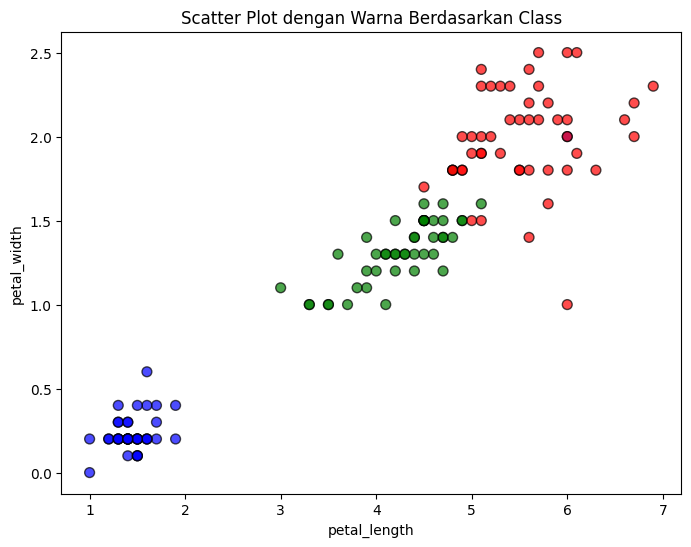

In [4]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Pastikan tidak ada NaN dalam kolom "class"
df_cleaned = df_cleaned.dropna(subset=["class"])

# Peta warna berdasarkan kelas
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Pastikan tidak ada NaN dalam kolom "color"
df_cleaned = df_cleaned.dropna(subset=["color"])

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()


Kode ini digunakan untuk mengambil, membersihkan, dan membagi dataset Iris yang berasal dari dua database (PostgreSQL dan MySQL).

-Kode ini menggabungkan data dari dua database (PostgreSQL & MySQL) dan
 membersihkannya sebelum digunakan dalam analisis atau model machine learning.

-Local Outlier Factor (LOF) digunakan untuk mendeteksi dan menghapus data
 outlier, sehingga meningkatkan kualitas dataset.

-Setelah pembersihan, data dibagi menjadi training (80%) dan testing (20%),  
 yang siap digunakan untuk modeling atau analisis lebih lanjut.

-Pembersihan data ini sangat penting, karena menghapus outlier dapat       meningkatkan akurasi model machine learning yang akan dilatih.

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()

    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns].values  # Data fitur
y = df_merged["class"]  # Label klasifikasi

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Bagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns], df_cleaned["class"], test_size=0.2, random_state=42
)

# Menampilkan jumlah data setelah pembagian
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")
print(f"Training set: {X_train.shape[0]} sampel")
print(f"Testing set: {X_test.shape[0]} sampel")

# Visualisasi data setelah pembersihan
# sns.pairplot(df_cleaned, hue="class")
# plt.show()


Jumlah data setelah pembersihan: 135
Training set: 108 sampel
Testing set: 27 sampel


Kode ini digunakan untuk mengambil data dari dua database (PostgreSQL & MySQL), melatih model K-Nearest Neighbors (KNN), dan memvisualisasikan decision boundary.

-Kode ini mengambil data dari dua sumber database, membersihkannya, dan melatih
 model KNN untuk klasifikasi Iris.

-Menggunakan Label Encoding untuk mengubah label kelas menjadi angka,
 memungkinkan algoritma machine learning untuk bekerja dengan baik.

-Model KNN dengan 11 tetangga memiliki akurasi tertentu yang dapat diukur     
 melalui laporan klasifikasi.

-Visualisasi decision boundary membantu memahami bagaimana model membedakan
 kelas-kelas berdasarkan dua fitur (petal_length dan petal_width).

-Model dibandingkan dengan dua jenis bobot (uniform dan distance) untuk melihat
 bagaimana distribusi keputusan berubah.

Akurasi: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.90      0.95        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.94      0.93      0.93        30



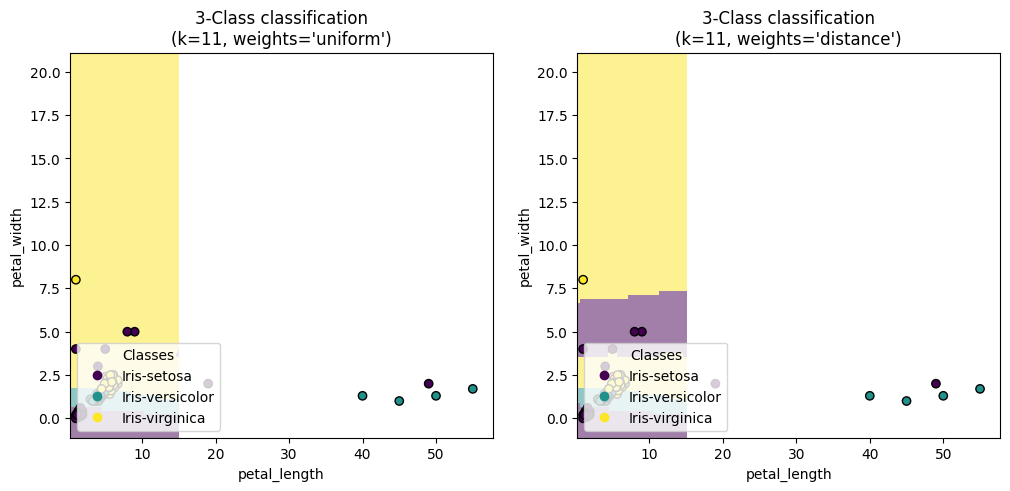

In [6]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


Kode ini bertujuan untuk mengambil data dari PostgreSQL dan MySQL, membersihkan data dengan deteksi outlier, melatih model KNN, dan mengevaluasi akurasinya.

-Kode ini mengambil data dari PostgreSQL dan MySQL, menggabungkannya, dan
 membersihkannya dari outlier menggunakan LOF.

-Model KNN dilatih setelah data dibagi menjadi training dan testing.
 Pipeline digunakan untuk memastikan preprocessing data berjalan otomatis dengan scaling.

-Evaluasi menunjukkan seberapa baik model KNN dalam mengklasifikasikan dataset
 iris setelah pembersihan outlier.

In [7]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values
target_values = df_merged["class"].values

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_values)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Menampilkan jumlah data sebelum dan setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df_merged.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns], df_cleaned["class"], test_size=0.2, random_state=42
)

# Pipeline dengan StandardScaler dan KNN
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

# Latih model
clf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Visualisasi data setelah pembersihan
# sns.pairplot(df_cleaned, hue="class")
# plt.show()

Jumlah data sebelum pembersihan: 150
Jumlah data setelah pembersihan: 135
Akurasi Model: 1.00

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



Kode ini bertujuan untuk mengambil data dari PostgreSQL dan MySQL, membersihkan outlier, melatih model KNN, serta memvisualisasikan decision boundary.


-Data dari PostgreSQL dan MySQL berhasil diambil dan digabungkan.

-Data outlier terdeteksi dengan LOF dan dihapus agar model lebih akurat.

-KNN dengan pipeline dan scaling menghasilkan model yang lebih stabil.

-Akurasi model dihitung dan laporan klasifikasi menunjukkan performa tiap kelas.

-Decision boundary divisualisasikan untuk memahami bagaimana model membagi  
kelas iris.

Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



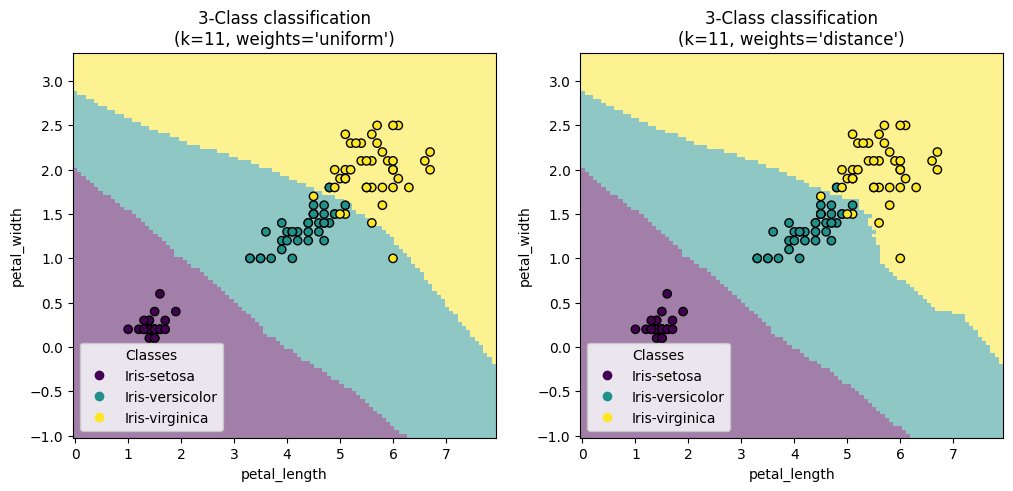

In [8]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


##Implementasi Naive Bayes pada Data iris

Naïve Bayes adalah sebuah algoritma klasifikasi yang berbasis pada Teorema Bayes dengan asumsi bahwa setiap fitur dalam data bersifat independen (naïve atau "naif"). Algoritma ini sering digunakan dalam berbagai aplikasi seperti klasifikasi teks, analisis sentimen dan deteksi spam.

##cara hitung
1. Hitung Kemungkinan dalam Spam

 -Kata "Gratis" muncul 6 kali dalam 10 email spam → Peluangnya 6/10 = 60%

 -Kata "Hadiah" muncul 5 kali dalam 10 email spam → Peluangnya 5/10 = 50%

 -Estimasi probabilitas email ini Spam:

   -Ambil nilai tengah → Rata-rata (60% + 50%) ÷ 2 = 55% kemungkinan Spam

2. Hitung Kemungkinan dalam Bukan Spam

 -Kata "Gratis" muncul 2 kali dalam 10 email bukan spam → Peluangnya 2/10 = 20%

 -Kata "Hadiah" muncul 1 kali dalam 10 email bukan spam → Peluangnya 1/10 = 10%

 -Estimasi probabilitas email ini Bukan Spam:

  -Ambil nilai tengah → Rata-rata (20% + 10%) ÷ 2 = 15% kemungkinan Bukan Spam



Number of mislabeled points with outliers out of a total 30 points : 7
Accuracy with outliers: 76.67%
Mislabeled points with outliers:
Index: 0, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 3, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 4, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 8, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 15, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 18, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 27, True Label: Iris-virginica, Predicted: Iris-setosa

Number of mislabeled points without outliers out of a total 27 points : 0
Accuracy without outliers: 100.00%
Mislabeled points without outliers:


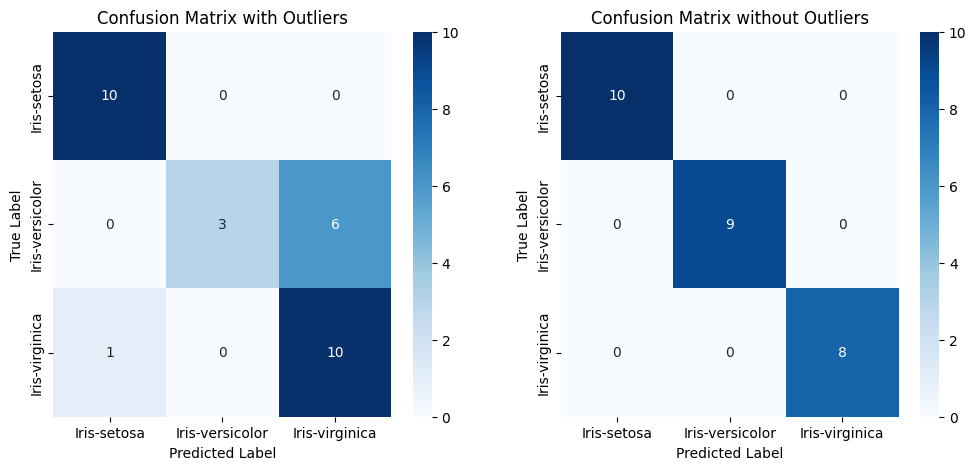

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_merged sudah ada dari kode sebelumnya

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
df_merged["class_encoded"] = label_encoder.fit_transform(df_merged["class"])

# Data dengan outlier
X_all = df_merged[feature_columns]
y_all = df_merged["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Data tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Split data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Split data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
gnb = GaussianNB()

# Latih dan uji model dengan outlier
y_pred_all = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
mislabeled_all = (y_test_all != y_pred_all).sum()
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Number of mislabeled points with outliers out of a total %d points : %d" % (X_test_all.shape[0], mislabeled_all))
print("Accuracy with outliers: %.2f%%" % (accuracy_all * 100))

# Menampilkan label yang salah pada data dengan outlier
mislabeled_indices_all = np.where(y_test_all != y_pred_all)[0]
print("Mislabeled points with outliers:")
for i in mislabeled_indices_all:
    true_label = label_encoder.inverse_transform([int(y_test_all[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_all[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")
print()
# Latih dan uji model tanpa outlier
y_pred_clean = gnb.fit(X_train_clean, y_train_clean).predict(X_test_clean)
mislabeled_clean = (y_test_clean != y_pred_clean).sum()
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Number of mislabeled points without outliers out of a total %d points : %d" % (X_test_clean.shape[0], mislabeled_clean))
print("Accuracy without outliers: %.2f%%" % (accuracy_clean * 100))

# Menampilkan label yang salah pada data tanpa outlier
mislabeled_indices_clean = np.where(y_test_clean != y_pred_clean)[0]
print("Mislabeled points without outliers:")
for i in mislabeled_indices_clean:
    true_label = label_encoder.inverse_transform([int(y_test_clean[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_clean[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_all, y_pred_all), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix with Outliers")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix without Outliers")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

Kode di atas  bertujuan untuk membandingkan performa model Naïve Bayes pada data dengan dan tanpa outlier.

1.Pemrosesan Data
-Label Encoding: Label kelas dikonversi ke bentuk numerik menggunakan LabelEncoder agar bisa digunakan dalam model.

-Pemilihan Fitur: Variabel fitur diambil dari feature_columns, sedangkan label target adalah "class_encoded".

-Penanganan Outlier:

-Dataset dengan outlier: Menggunakan seluruh data (df_merged).

-Dataset tanpa outlier: Menyaring hanya data yang bukan outlier (df_cleaned), dengan mempertahankan hanya data di mana "outlier" == 1.


2.Pembagian Data
Data dengan outlier dibagi menjadi training dan testing set menggunakan train_test_split (80% train, 20% test).

Data tanpa outlier juga dibagi dengan cara yang sama.

3.Training & Prediksi dengan Gaussian Naïve Bayes
Model GaussianNB dilatih pada kedua dataset:

Model pertama dilatih dengan data yang mengandung outlier.

Model kedua dilatih dengan data yang sudah dibersihkan dari outlier.

Model kemudian memprediksi hasil pada data uji.

4.Evaluasi Model
Menghitung jumlah kesalahan prediksi (mislabeled points) pada kedua dataset.

Akurasi dihitung menggunakan accuracy_score:

Akurasi dengan outlier.

Akurasi tanpa outlier.

Menampilkan label yang salah diprediksi untuk melihat di mana model mengalami kesalahan.

5.Visualisasi dengan Confusion Matrix
Dua confusion matrix dibuat menggunakan seaborn.heatmap() untuk:

Model dengan outlier.

Model tanpa outlier.

Confusion matrix membantu melihat bagaimana kesalahan prediksi terjadi antar kelas.
